In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Load your dataset (replace 'your_dataset.csv' with the actual path)
#df = pd.read_csv('train_data_twitter.csv')


df_train = pd.read_csv('train_data_twitter2.csv')

df_train['text'] = df_train['text'].values.astype('U')


X_train = df_train['text']
y_train = df_train['label']

df_test = pd.read_csv('test_data_twitter2.csv')

df_test['text'] = df_test['text'].values.astype('U')

X_test = df_test['text']
y_test = df_test['label']

# Assuming you have 'text' column for text data and 'emotion' column for labels
#X_train = df['text']
#X_test = df['label']

#df1 = pd.read_csv('test_data_twitter.csv')

#y_train = df1['text']
#y_test = df1['label']

# Convert text data to Bag-of-Words representation
#vectorizer = CountVectorizer(max_features=5000)  # Adjust the max_features based on your dataset
#X_train = vectorizer.fit_transform(X_train).toarray()
#y_train = vectorizer.fit_transform(y_train).toarray()

#vectorizer = CountVectorizer(max_features=5000)  # Adjust the max_features based on your dataset

from sklearn.feature_extraction.text import TfidfVectorizer
#tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train = tfidf_vectorizer.fit_transform(X_train).toarray()
X_test = tfidf_vectorizer.transform(X_test).toarray()

# Convert labels to one-hot encoded vectors
#y = pd.get_dummies(y)
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)


# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Build the neural network model
model = Sequential()
model.add(Dense(512, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(6, activation='softmax'))  # Assuming 6 emotion classes
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=128, validation_data=(X_test, y_test))

# Evaluate the model on the test set
accuracy = model.evaluate(X_test, y_test, verbose=0)[1]
print(f"Test Accuracy: {accuracy}")

# Generate and print the confusion matrix
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(np.argmax(y_test.values, axis=1), np.argmax(y_pred, axis=1))
print("Confusion Matrix:")
print(conf_matrix)


Epoch 1/5
609/609 [==============================] - 30s 45ms/step - loss: 0.5276 - accuracy: 0.8154 - val_loss: 0.2631 - val_accuracy: 0.9096
Epoch 2/5
609/609 [==============================] - 27s 44ms/step - loss: 0.2187 - accuracy: 0.9240 - val_loss: 0.2625 - val_accuracy: 0.9099
Epoch 3/5
609/609 [==============================] - 26s 43ms/step - loss: 0.1618 - accuracy: 0.9392 - val_loss: 0.2945 - val_accuracy: 0.9066
Epoch 4/5
609/609 [==============================] - 26s 43ms/step - loss: 0.1275 - accuracy: 0.9491 - val_loss: 0.3644 - val_accuracy: 0.8982
Epoch 5/5
609/609 [==============================] - 27s 45ms/step - loss: 0.1089 - accuracy: 0.9542 - val_loss: 0.3755 - val_accuracy: 0.9032
Test Accuracy: 0.903166651725769
375/375 [==============================] - 2s 5ms/step
Confusion Matrix:
[[1778   45   33   69   59   16]
 [  33 1729  156   23   19   40]
 [   6   56 1916   10    4    8]
 [  49   32   17 1800   96    6]
 [  36   16    8   42 1714  184]
 [  11   14   

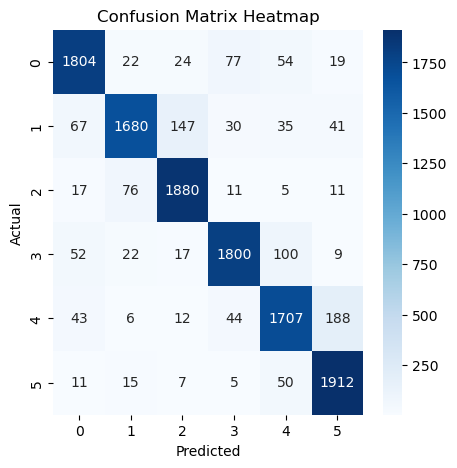

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1', '2', '3', '4', '5'], yticklabels=['0', '1', '2', '3', '4', '5'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Load your dataset
df_train = pd.read_csv('train_data_twitter2.csv')
df_train['text'] = df_train['text'].values.astype('U')

X_train = df_train['text']
y_train = df_train['label']

df_test = pd.read_csv('test_data_twitter2.csv')
df_test['text'] = df_test['text'].values.astype('U')

X_test = df_test['text']
y_test = df_test['label']

# Convert text data to Bag-of-Words representation
vectorizer = CountVectorizer(max_features=5000)  # Adjust the max_features based on your dataset
X_train = vectorizer.fit_transform(X_train).toarray()
X_test = vectorizer.transform(X_test).toarray()

# Convert labels to one-hot encoded vectors
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

# Build the neural network model
model = Sequential()
model.add(Dense(512, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(6, activation='softmax'))  # Assuming 6 emotion classes
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=128, validation_data=(X_test, y_test))

# Evaluate the model on the test set
accuracy = model.evaluate(X_test, y_test, verbose=0)[1]
print(f"Test Accuracy: {accuracy}")

# Generate and print the confusion matrix
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(np.argmax(y_test.values, axis=1), np.argmax(y_pred, axis=1))
print("Confusion Matrix:")
print(conf_matrix)




Epoch 1/5


609/609 [==============================] - 32s 47ms/step - loss: 0.5149 - accuracy: 0.8224 - val_loss: 0.2550 - val_accuracy: 0.9081
Epoch 2/5
609/609 [==============================] - 28s 47ms/step - loss: 0.2054 - accuracy: 0.9270 - val_loss: 0.2567 - val_accuracy: 0.9098
Epoch 3/5
609/609 [==============================] - 27s 44ms/step - loss: 0.1527 - accuracy: 0.9420 - val_loss: 0.2843 - val_accuracy: 0.9103
Epoch 4/5
609/609 [==============================] - 28s 45ms/step - loss: 0.1249 - accuracy: 0.9489 - val_loss: 0.3518 - val_accuracy: 0.9097
Epoch 5/5
609/609 [==============================] - 27s 45ms/step - loss: 0.1071 - accuracy: 0.9542 - val_loss: 0.3778 - val_accuracy: 0.9072
Test Accuracy: 0.9072499871253967
375/375 [==============================] - 3s 6ms/step
Confusion Matrix:
[[1788   31   28   86   51   16]
 [  55 1714  147   25   19   40]
 [  10   41 1934    8    1    6]
 [  35   23   18 1820   96    8]
 [  33   14   15   53 1700  185]
 [   9   

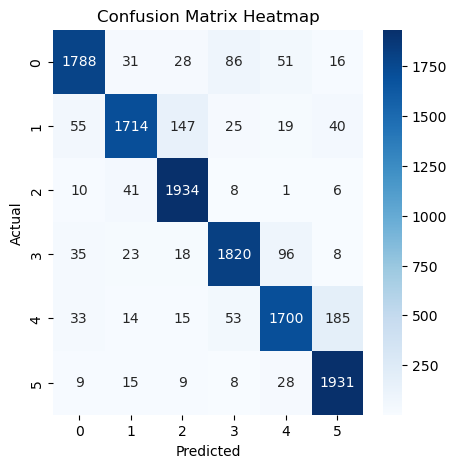

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1', '2', '3', '4', '5'], yticklabels=['0', '1', '2', '3', '4', '5'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [12]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Load your dataset
df_train = pd.read_csv('train_data_twitter2.csv')
df_train['text'] = df_train['text'].values.astype('U')

X = df_train['text']
y = df_train['label']

# Convert text data to Bag-of-Words representation
vectorizer = CountVectorizer(max_features=5000)  # Adjust the max_features based on your dataset
X = vectorizer.fit_transform(X).toarray()

# Convert labels to one-hot encoded vectors
y = pd.get_dummies(y)

# Build the neural network model
model = Sequential()
model.add(Dense(512, input_shape=(X.shape[1],), activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(6, activation='softmax'))  # Assuming 6 emotion classes
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Perform 5-fold cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
fold_accuracies = []

for train_index, val_index in kfold.split(X, np.argmax(y.values, axis=1)):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    # Train the model
    model.fit(X_train, y_train, epochs=5, batch_size=128, validation_data=(X_val, y_val), verbose=0)

    # Evaluate the model on the validation set
    accuracy = model.evaluate(X_val, y_val, verbose=0)[1]
    fold_accuracies.append(accuracy)

# Calculate and print the average accuracy across folds
average_accuracy = np.mean(fold_accuracies)
print(f"Average Cross-Validation Accuracy: {average_accuracy}")

# Evaluate the model on the test set
df_test = pd.read_csv('test_data_twitter2.csv')
df_test['text'] = df_test['text'].values.astype('U')

X_test = df_test['text']
y_test = df_test['label']

X_test = vectorizer.transform(X_test).toarray()
y_test = pd.get_dummies(y_test)

test_accuracy = model.evaluate(X_test, y_test, verbose=0)[1]
print(f"Test Accuracy: {test_accuracy}")

# Generate and print the confusion matrix
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(np.argmax(y_test.values, axis=1), np.argmax(y_pred, axis=1))
print("Confusion Matrix:")
print(conf_matrix)


Average Cross-Validation Accuracy: 0.9486335515975952
Test Accuracy: 0.8912500143051147
375/375 [==============================] - 3s 6ms/step
Confusion Matrix:
[[1818   35   22   68   41   16]
 [  64 1721  136   23   16   40]
 [  15  142 1817   16    3    7]
 [  57   22   10 1837   66    8]
 [  61   25   12   87 1627  188]
 [   9   21   10    7   78 1875]]


In [18]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Load your dataset (replace 'your_dataset.csv' with the actual path)
#df = pd.read_csv('train_data_twitter.csv')


df_train = pd.read_csv('train_data_twitter2.csv')

df_train['text'] = df_train['text'].values.astype('U')


X_train = df_train['text']
y_train = df_train['label']

df_test = pd.read_csv('test_data_twitter2.csv')

df_test['text'] = df_test['text'].values.astype('U')

X_test = df_test['text']
y_test = df_test['label']

# Assuming you have 'text' column for text data and 'emotion' column for labels
#X_train = df['text']
#X_test = df['label']

#df1 = pd.read_csv('test_data_twitter.csv')

#y_train = df1['text']
#y_test = df1['label']

# Convert text data to Bag-of-Words representation
#vectorizer = CountVectorizer(max_features=5000)  # Adjust the max_features based on your dataset
#X_train = vectorizer.fit_transform(X_train).toarray()
#y_train = vectorizer.fit_transform(y_train).toarray()

#vectorizer = CountVectorizer(max_features=5000)  # Adjust the max_features based on your dataset

from sklearn.feature_extraction.text import TfidfVectorizer
#tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train = tfidf_vectorizer.fit_transform(X_train).toarray()
X_test = tfidf_vectorizer.transform(X_test).toarray()

# Convert labels to one-hot encoded vectors
#y = pd.get_dummies(y)
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)


# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Build the neural network model
model = Sequential()
model.add(Dense(512, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(6, activation='softmax'))  # Assuming 6 emotion classes
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=128, validation_data=(X_test, y_test))

# Evaluate the model on the test set
accuracy = model.evaluate(X_test, y_test, verbose=0)[1]
print(f"Test Accuracy: {accuracy}")

# Generate and print the confusion matrix
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(np.argmax(y_test.values, axis=1), np.argmax(y_pred, axis=1))
print("Confusion Matrix:")
print(conf_matrix)

Epoch 1/5
609/609 [==============================] - 33s 43ms/step - loss: 0.5266 - accuracy: 0.8134 - val_loss: 0.2605 - val_accuracy: 0.9070
Epoch 2/5
609/609 [==============================] - 25s 42ms/step - loss: 0.2114 - accuracy: 0.9256 - val_loss: 0.2665 - val_accuracy: 0.9084
Epoch 3/5
609/609 [==============================] - 25s 41ms/step - loss: 0.1569 - accuracy: 0.9409 - val_loss: 0.2898 - val_accuracy: 0.9042
Epoch 4/5
609/609 [==============================] - 26s 43ms/step - loss: 0.1273 - accuracy: 0.9488 - val_loss: 0.3355 - val_accuracy: 0.9056
Epoch 5/5
609/609 [==============================] - 26s 43ms/step - loss: 0.1057 - accuracy: 0.9554 - val_loss: 0.3753 - val_accuracy: 0.9042
Test Accuracy: 0.9041666388511658
375/375 [==============================] - 2s 6ms/step
Confusion Matrix:
[[1820   46   21   54   41   18]
 [  44 1750  137   10   18   41]
 [  11   71 1900    7    2    9]
 [  55   55   24 1758   98   10]
 [  45   22    8   49 1694  182]
 [   7   13  

In [19]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Calculate precision, recall, and F1 score
precision = precision_score(np.argmax(y_test.values, axis=1), np.argmax(y_pred, axis=1), average='weighted')
recall = recall_score(np.argmax(y_test.values, axis=1), np.argmax(y_pred, axis=1), average='weighted')
f1 = f1_score(np.argmax(y_test.values, axis=1), np.argmax(y_pred, axis=1), average='weighted')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Precision: 0.9047191143253256
Recall: 0.9041666666666667
F1 Score: 0.9037709230780122


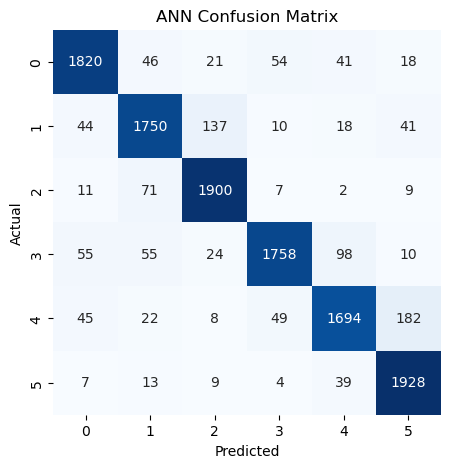

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1', '2', '3', '4', '5'], yticklabels=['0', '1', '2', '3', '4', '5'], cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('ANN Confusion Matrix')
plt.show()

In [21]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Load your dataset
df_train = pd.read_csv('train_data_twitter2.csv')
df_train['text'] = df_train['text'].values.astype('U')

X_train = df_train['text']
y_train = df_train['label']

df_test = pd.read_csv('test_data_twitter2.csv')
df_test['text'] = df_test['text'].values.astype('U')

X_test = df_test['text']
y_test = df_test['label']

# Convert text data to Bag-of-Words representation
vectorizer = CountVectorizer(max_features=5000)  # Adjust the max_features based on your dataset
X_train = vectorizer.fit_transform(X_train).toarray()
X_test = vectorizer.transform(X_test).toarray()

# Convert labels to one-hot encoded vectors
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

# Build the neural network model
model = Sequential()
model.add(Dense(512, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(6, activation='softmax'))  # Assuming 6 emotion classes
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=128, validation_data=(X_test, y_test))

# Evaluate the model on the test set
accuracy = model.evaluate(X_test, y_test, verbose=0)[1]
print(f"Test Accuracy: {accuracy}")

# Generate and print the confusion matrix
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(np.argmax(y_test.values, axis=1), np.argmax(y_pred, axis=1))
print("Confusion Matrix:")
print(conf_matrix)

# Calculate precision, recall, and F1 score
precision = precision_score(np.argmax(y_test.values, axis=1), np.argmax(y_pred, axis=1), average='weighted')
recall = recall_score(np.argmax(y_test.values, axis=1), np.argmax(y_pred, axis=1), average='weighted')
f1 = f1_score(np.argmax(y_test.values, axis=1), np.argmax(y_pred, axis=1), average='weighted')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Epoch 1/5
609/609 [==============================] - 31s 46ms/step - loss: 0.5068 - accuracy: 0.8255 - val_loss: 0.2539 - val_accuracy: 0.9087
Epoch 2/5
609/609 [==============================] - 27s 44ms/step - loss: 0.2053 - accuracy: 0.9278 - val_loss: 0.2611 - val_accuracy: 0.9109
Epoch 3/5
609/609 [==============================] - 27s 45ms/step - loss: 0.1533 - accuracy: 0.9419 - val_loss: 0.2712 - val_accuracy: 0.9084
Epoch 4/5
609/609 [==============================] - 26s 43ms/step - loss: 0.1282 - accuracy: 0.9488 - val_loss: 0.3217 - val_accuracy: 0.9059
Epoch 5/5
609/609 [==============================] - 27s 45ms/step - loss: 0.1073 - accuracy: 0.9557 - val_loss: 0.3688 - val_accuracy: 0.9047
Test Accuracy: 0.9047499895095825
375/375 [==============================] - 2s 6ms/step
Confusion Matrix:
[[1797   48   18   75   45   17]
 [  42 1733  144   22   18   41]
 [  16   71 1887   12    2   12]
 [  48   32   15 1789  107    9]
 [  43   14    8   34 1714  187]
 [   6   15  

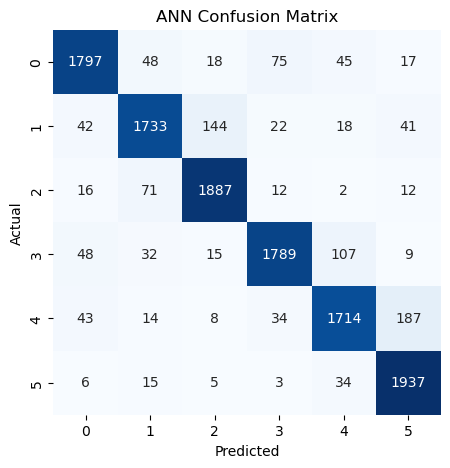

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1', '2', '3', '4', '5'], yticklabels=['0', '1', '2', '3', '4', '5'], cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('ANN Confusion Matrix')
plt.show()